In [1]:
#!pip3 install --upgrade gym==0.25.2
import gym
print (gym.__version__)

0.25.2


# A2C_PPO

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Hyperparameters
gamma = 0.99  # Discount factor for future rewards
epsilon = 0.15  # PPO clipping factor
actor_lr = 0.0003  # Learning rate for actor
critic_lr = 0.001  # Learning rate for critic
batch_size = 64  # Batch size for training
n_epochs = 10  # Number of epochs per update
update_interval = 80000  # Steps between updates

# Environment
env = gym.make('CartPole-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Actor Model
def get_actor():
    inputs = layers.Input(shape=(state_dim,))
    x = layers.Dense(128, activation="relu")(inputs)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(action_dim, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Critic Model
def get_critic():
    inputs = layers.Input(shape=(state_dim,))
    x = layers.Dense(128, activation="relu")(inputs)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

actor = get_actor()
critic = get_critic()
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)
critic_optimizer = tf.keras.optimizers.Adam(critic_lr)

# Function to get action based on policy
def get_action(state):
    state = state.reshape([1, state_dim])
    prob = actor(state).numpy()
    action = np.random.choice(action_dim, p=prob[0])
    return action, prob

# Function to compute discounted rewards
def compute_discounted_rewards(rewards, dones, next_value):
    discounted_rewards = []
    R = next_value
    for reward, done in zip(reversed(rewards), reversed(dones)):
        R = reward + gamma * R * (1 - done)
        discounted_rewards.insert(0, R)
    return discounted_rewards


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:23: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  serialized_pb=_b('\n,tensorflow/core/framework/tensor_shape.proto\x12\ntensorflow\"z\n\x10TensorShapeProto\x12-\n\x03\x64im\x18\x02 \x03(\x0b\x32 .tensorflow.TensorShapeProto.Dim\x12\x14\n\x0cunknown_rank\x18\x03 \x01(\x08\x1a!\n\x03\x44im\x12\x0c\n\x04size\x18\x01 \x01(\x03\x12\x0c\n\x04name\x18\x02 \x01(\tB\x87\x01\n\x18org.tensorflow.frameworkB\x11TensorShapeProtosP\x01ZSgithub.com/tensorflow/tensorflow/tensorflow/go/core/framework/tensor_shape_go_proto\xf8\x01\x01\x62\x06proto3')
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:42: DeprecationWarning: Call to deprecated create function FieldD

Episode finished with score: 36.0
Episode finished with score: 29.0
Episode finished with score: 16.0
Episode finished with score: 20.0
Episode finished with score: 34.0
Episode finished with score: 16.0
Episode finished with score: 12.0
Episode finished with score: 15.0
Episode finished with score: 10.0
Episode finished with score: 19.0
Episode finished with score: 15.0
Episode finished with score: 36.0
Episode finished with score: 35.0
Episode finished with score: 29.0
Episode finished with score: 15.0
Episode finished with score: 14.0
Episode finished with score: 13.0
Episode finished with score: 26.0
Episode finished with score: 35.0
Episode finished with score: 40.0
Episode finished with score: 10.0
Episode finished with score: 43.0
Episode finished with score: 16.0
Episode finished with score: 21.0
Episode finished with score: 27.0
Episode finished with score: 11.0
Episode finished with score: 19.0
Episode finished with score: 17.0
Episode finished with score: 9.0
Episode finishe

Episode finished with score: 230.0
Episode finished with score: 73.0
Episode finished with score: 50.0
Episode finished with score: 54.0
Episode finished with score: 89.0
Episode finished with score: 118.0
Episode finished with score: 112.0
Episode finished with score: 210.0
Episode finished with score: 94.0
Episode finished with score: 112.0
Episode finished with score: 163.0
Episode finished with score: 113.0
Episode finished with score: 36.0
Episode finished with score: 143.0
Episode finished with score: 59.0
Episode finished with score: 201.0
Episode finished with score: 152.0
Episode finished with score: 199.0
Episode finished with score: 151.0
Episode finished with score: 133.0
Episode finished with score: 148.0
Episode finished with score: 119.0
Episode finished with score: 152.0
Episode finished with score: 273.0
Episode finished with score: 170.0
Episode finished with score: 184.0
Episode finished with score: 122.0
Episode finished with score: 122.0
Episode finished with score

Episode finished with score: 252.0
Episode finished with score: 331.0
Episode finished with score: 169.0
Episode finished with score: 500.0
Episode finished with score: 350.0
Episode finished with score: 275.0
Episode finished with score: 209.0
Episode finished with score: 435.0
Episode finished with score: 500.0
Episode finished with score: 360.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 295.0
Episode finished with score: 295.0
Episode finished with score: 143.0
Episode finished with score: 393.0
Episode finished with score: 500.0
Episode finished with score: 229.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 343.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 500.0
Episode finished with score: 339.0
Episode finished wit

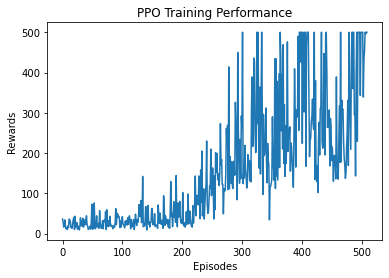

In [3]:
import matplotlib.pyplot as plt

# Training loop with reward tracking
state = env.reset()
states, actions, rewards, probs, dones = [], [], [], [], []
scores = []
episode_rewards = []
score = 0

for step in range(1, update_interval + 1): # 1. 학습할 총 스텝수마다
    action, prob = get_action(state) # 2. 확률공간에 기반하여 행동 선택
    next_state, reward, done, _ = env.step(action) # 3. 행동 후 상태 업데이트

    states.append(state)
    actions.append(action)
    rewards.append(reward)
    probs.append(prob[0, action])
    dones.append(done)

    state = next_state
    score += reward

    if done:
        episode_rewards.append(score)
        state = env.reset()
        print(f"Episode finished with score: {score}")
        score = 0

    if step % batch_size == 0: # 4. 배치 사이즈마다
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        probs = np.array(probs)
        dones = np.array(dones)

        # Compute next value from critic
        next_value = critic(np.array([next_state]))[0, 0] # 5. 비평가 네트워크에서 다음 가치(할인 적용) 예측
        discounted_rewards = compute_discounted_rewards(rewards, dones, next_value) # 할인 적용

        discounted_rewards = np.array(discounted_rewards)
        values = critic(states).numpy().flatten()
        advantages = discounted_rewards - values # 6. 이익계산

        with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
            # 7. 행동자 업데이트 : clip을 적용하여 행동의 확률공간을 업데이트 -> 현재 정책(가능한 모든 경우의 수에 대한 기대가치)을 최적화
            # 지금의 상황의 가치를 평가한다는 것은 곧 모든 가능한 행동의 확률공간이 유리하다는 것. 
            action_masks = tf.one_hot(actions, action_dim)
            log_probs = tf.reduce_sum(action_masks * tf.math.log(actor(states)), axis=1)
            old_log_probs = tf.math.log(probs)
            ratios = tf.exp(log_probs - old_log_probs)
            clipped_ratios = tf.clip_by_value(ratios, 1 - epsilon, 1 + epsilon)
            actor_loss = -tf.reduce_mean(tf.minimum(ratios * advantages, clipped_ratios * advantages))

            # 7. 비평가 업데이트 : 선택한 행동에 의한 결과의 가치가 계산된 가치와 근접하도록 최적화
            critic_loss = tf.reduce_mean(tf.square(discounted_rewards - critic(states)))

        # Update actor and critic networks
        actor_grads = tape1.gradient(actor_loss, actor.trainable_variables)
        critic_grads = tape2.gradient(critic_loss, critic.trainable_variables)
        actor_optimizer.apply_gradients(zip(actor_grads, actor.trainable_variables))
        critic_optimizer.apply_gradients(zip(critic_grads, critic.trainable_variables))

        states, actions, rewards, probs, dones = [], [], [], [], []

# Plotting the episode rewards
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('PPO Training Performance')
plt.show()

env.close()


# Double DQN with PER

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random

# SumTree and PrioritizedReplayBuffer class definitions
class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.size = 0
        self.write = 0

    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change
        if parent != 0:
            self._propagate(parent, change)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1
        if left >= len(self.tree):
            return idx
        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])

    def total(self):
        return self.tree[0]

    def add(self, priority, data):
        idx = self.write + self.capacity - 1
        self.data[self.write] = data
        self.update(idx, priority)
        self.write += 1
        if self.write >= self.capacity:
            self.write = 0
        if self.size < self.capacity:
            self.size += 1

    def update(self, idx, priority):
        change = priority - self.tree[idx]
        self.tree[idx] = priority
        self._propagate(idx, change)

    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1
        return idx, self.tree[idx], self.data[dataIdx]

class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6):
        self.tree = SumTree(capacity)
        self.capacity = capacity
        self.alpha = alpha

    def add(self, error, sample):
        p = (error + 1e-5) ** self.alpha
        self.tree.add(p, sample)

    def sample(self, n, beta=0.4):
        batch = []
        segment = self.tree.total() / n
        priorities = []
        indices = []
        for i in range(n):
            s = random.uniform(segment * i, segment * (i + 1))
            idx, p, data = self.tree.get(s)
            priorities.append(p)
            batch.append(data)
            indices.append(idx)
        sampling_probabilities = priorities / self.tree.total()
        is_weight = np.power(self.tree.size * sampling_probabilities, -beta)
        is_weight /= is_weight.max()
        return batch, indices, is_weight

    def update(self, idx, error):
        p = (error + 1e-5) ** self.alpha
        self.tree.update(idx, p)


# QNetwork class definition
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def select_action(q_network, state, epsilon, action_dim):
    if random.random() < epsilon:
        return random.choice(range(action_dim))
    else:
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_network(state)
        return q_values.argmax().item()

def train_double_dqn(env, q_network, target_network, optimizer, replay_buffer, batch_size, gamma, beta):
    '''
    배치 사이즈마다 학습을 진행.우선순위 버퍼에서 샘플 데이터를 골라 온다
    현상태에 대해 q네트워크가 행동을 선택하게 하고 q-value를 계산
    다음상태에 대해 타겟네트워크의 q-value를 계산 예측하게 한다.
    이 차이를 줄이도록 학습시킴
    '''
    if len(replay_buffer.tree.data) < batch_size:
          return
    batch, indices, is_weights = replay_buffer.sample(batch_size, beta)
    states, actions, rewards, next_states, dones = zip(*batch)
    
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions).unsqueeze(1)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    dones = torch.FloatTensor(dones)
    is_weights = torch.FloatTensor(is_weights)
    
    q_values = q_network(states).gather(1, actions).squeeze()
    next_q_values = target_network(next_states).max(1)[0]
    expected_q_values = rewards + (gamma * next_q_values * (1 - dones))
    
    errors = torch.abs(q_values - expected_q_values.detach()).cpu().data.numpy()
    for i in range(batch_size):
        replay_buffer.update(indices[i], errors[i])
        
    loss = (is_weights * (q_values - expected_q_values.detach()).pow(2)).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


def main():
    env = gym.make('CartPole-v1')
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Double Network : 가치가 때때로 과대평가되는 현상을 방지하고 안정적으로 학습
    # q_network : action을 선택할 때는 environment와 상호작용하는 네트워크를 사용
    # target_network : 가치를 평가할 때는 environment와 독립된 네트워크를 사용. 배치마다 q_network의 파라미터를 복사받음.
    q_network = QNetwork(state_dim, action_dim)
    target_network = QNetwork(state_dim, action_dim)
    target_network.load_state_dict(q_network.state_dict())

    optimizer = optim.Adam(q_network.parameters(), lr=1e-3)
    replay_buffer = PrioritizedReplayBuffer(10000) # alpha : 우선순위가 해당 샘플을 선택하는데 관여하는 정도 (0: 모두 랜덤, 1 : 우선순위가 곧 확률)
    batch_size = 64 # 학습 갱신 주기
    gamma = 0.99 # 현재 즉각적인 보상 대비 미래 예상 보상의 가중치
    epsilon = 1.0 # 탐사율
    epsilon_decay = 0.99 # 탐사율 감소율
    epsilon_min = 0.001 # 최소 탐사율
    beta_start = 0.4 # 중요도 대비 최신 데이터의 중요성. 갈수록 1에 가까워지도록
    beta_frames = 1000 # 베타의 증가도
    beta = beta_start
    target_update_frequency = 10

    num_episodes = 500
    frame_idx = 0

    ############################ pseudo code ########################################
    # 1. 에피소드 마다

    ## 2. 환경 , 보상 초기화
    ## 3. 게임이 끝나지 않는 한

    ### 4. 베타 조정
    ### 5. 행동 선택
    ### 6. 선택된 행동 반영후 변화된 환경, 보상, 종료여부를 수집
    ### 7. 우선순위 버퍼에 저장
    ### 8. 상태와 보상 변경
    ### 9. 네트워크 학습

    ## 10. 게임 종료시 특정 에피소드마다 네트워크 복사

    ############################ pseudo code ########################################


    for episode in range(num_episodes): # 1. 에피소드 마다
        state = env.reset()  ## 2. 환경 , 보상 초기화
        total_reward = 0 ## 3. 게임이 끝나지 않는 한
        done = False
        while not done:
            frame_idx += 1
            beta = min(1.0, beta_start + frame_idx * (1.0 - beta_start) / beta_frames) ### 4. 베타 조정
            action = select_action(q_network, state, epsilon, action_dim) ### 5. 행동 선택
            next_state, reward, done, _ = env.step(action) ### 6. 선택된 행동 반영후 변화된 환경, 보상, 종료여부를 수집
            replay_buffer.add(abs(reward), (state, action, reward, next_state, done)) ### 7. 우선순위 버퍼에 저장
            state = next_state ### 8. 상태와 보상 변경
            total_reward += reward  ### 8. 상태와 보상 변경

            train_double_dqn(env, q_network, target_network, optimizer, replay_buffer, batch_size, gamma, beta)  ### 9. 네트워크 학습

            if done:
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay
                print(f"Episode: {episode}, Total Reward: {total_reward}")

        if episode % target_update_frequency == 0:
            target_network.load_state_dict(q_network.state_dict())

    # Save the trained model
    torch.save(q_network.state_dict(), 'double_dqn_per_cartpole.pth')

    # Load the trained model
    q_network.load_state_dict(torch.load('double_dqn_per_cartpole.pth'))

    # Evaluation
    state = env.reset()
    for _ in range(1000):
        action = select_action(q_network, state, epsilon=0, action_dim=action_dim)
        state, reward, done, _ = env.step(action)
        env.render()
        if done:
            state = env.reset()
    env.close()

if __name__ == "__main__":
    main()


C:\ProgramData\Anaconda3\lib\site-packages\gym\core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
C:\ProgramData\Anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
C:\ProgramData\Anaconda3\lib\site-

Episode: 0, Total Reward: 13.0
Episode: 1, Total Reward: 16.0
Episode: 2, Total Reward: 15.0
Episode: 3, Total Reward: 9.0
Episode: 4, Total Reward: 19.0
Episode: 5, Total Reward: 21.0
Episode: 6, Total Reward: 12.0
Episode: 7, Total Reward: 18.0
Episode: 8, Total Reward: 15.0
Episode: 9, Total Reward: 17.0
Episode: 10, Total Reward: 15.0
Episode: 11, Total Reward: 18.0
Episode: 12, Total Reward: 12.0
Episode: 13, Total Reward: 13.0
Episode: 14, Total Reward: 41.0
Episode: 15, Total Reward: 25.0
Episode: 16, Total Reward: 14.0
Episode: 17, Total Reward: 18.0
Episode: 18, Total Reward: 17.0
Episode: 19, Total Reward: 18.0
Episode: 20, Total Reward: 12.0
Episode: 21, Total Reward: 11.0
Episode: 22, Total Reward: 18.0
Episode: 23, Total Reward: 22.0
Episode: 24, Total Reward: 16.0
Episode: 25, Total Reward: 14.0
Episode: 26, Total Reward: 11.0
Episode: 27, Total Reward: 11.0
Episode: 28, Total Reward: 20.0
Episode: 29, Total Reward: 19.0
Episode: 30, Total Reward: 22.0
Episode: 31, Total 

Episode: 248, Total Reward: 194.0
Episode: 249, Total Reward: 190.0
Episode: 250, Total Reward: 457.0
Episode: 251, Total Reward: 394.0
Episode: 252, Total Reward: 180.0
Episode: 253, Total Reward: 118.0
Episode: 254, Total Reward: 167.0
Episode: 255, Total Reward: 209.0
Episode: 256, Total Reward: 396.0
Episode: 257, Total Reward: 169.0
Episode: 258, Total Reward: 191.0
Episode: 259, Total Reward: 184.0
Episode: 260, Total Reward: 216.0
Episode: 261, Total Reward: 500.0
Episode: 262, Total Reward: 156.0
Episode: 263, Total Reward: 500.0
Episode: 264, Total Reward: 436.0
Episode: 265, Total Reward: 183.0
Episode: 266, Total Reward: 30.0
Episode: 267, Total Reward: 184.0
Episode: 268, Total Reward: 174.0
Episode: 269, Total Reward: 43.0
Episode: 270, Total Reward: 147.0
Episode: 271, Total Reward: 51.0
Episode: 272, Total Reward: 22.0
Episode: 273, Total Reward: 471.0
Episode: 274, Total Reward: 500.0
Episode: 275, Total Reward: 333.0
Episode: 276, Total Reward: 178.0
Episode: 277, Tota

Episode: 490, Total Reward: 500.0
Episode: 491, Total Reward: 500.0
Episode: 492, Total Reward: 500.0
Episode: 493, Total Reward: 500.0
Episode: 494, Total Reward: 30.0
Episode: 495, Total Reward: 500.0
Episode: 496, Total Reward: 500.0
Episode: 497, Total Reward: 500.0
Episode: 498, Total Reward: 500.0
Episode: 499, Total Reward: 500.0


C:\ProgramData\Anaconda3\lib\site-packages\gym\core.py:50: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "
